In [1]:
import numpy as np
import tensorflow as tf
import keras
from keras.utils import to_categorical
import SimpleITK as sitk
import os
import matplotlib.pyplot as plt

"""Classify 3D radiology images with a neural network.
First simple classification Kidney images vs. Prostate images, to develop pipeline. 
Greatly downsampled to fit 3D images on home computer GPU. 
(c) Karl Diedrich 2018 <ktdiedrich@gmail.com>
"""

def read_DICOM(dir_path):
    'Read DICOM image from directory'
    reader = sitk.ImageSeriesReader()
    dicom_names = reader.GetGDCMSeriesFileNames( dir_path )
    if len(dicom_names) > 0:
        reader.SetFileNames(dicom_names)
        image = reader.Execute()
        return image
    else:
        return None

def read_DICOMs(rootdir):
    'Read all DICOMs in a directory tree'
    images = list()
    for root, subFolders, files in os.walk(rootdir):
        for subf in subFolders:
            try:
                dir_path = os.path.join(root, subf)
                image = read_DICOM(dir_path=dir_path)
                # if image:
                #    print("Read {}".format(dir_path))
            except:
                pass
                # print("Error reading {}".format(dir_path))
            if image:
                if image.GetSize()[2] > 1:
                    # im_array = sitk.GetArrayFromImage(image)
                    images.append(image)
    return images

def show_slice(im, axis=1, fract=0.5):
    'Show slice along axis at fraction of slice'
    idx = int(im.shape[axis]*fract)
    if axis == 0:
        im_slice = im[idx, :, :]
    elif axis == 1:
        im_slice = im[:, idx, :]
    elif axis == 2:
        im_slice = im[:, :, idx]
    else:
        im_slice = im[idx, :, :]
        
    plt.imshow(im_slice, cmap='gray')
    

Using TensorFlow backend.


In [2]:
LIDC0001 = read_DICOM('/home/ktdiedrich/Documents/localData/RadiologyImages/LIDC-IDRI/LIDC-IDRI/LIDC-IDRI-0001/01-01-2000-30178/3000566-03192')

In [3]:
print(LIDC0001)

Image (0x563b6baca2d0)
  RTTI typeinfo:   itk::Image<int, 3u>
  Reference Count: 1
  Modified Time: 5389
  Debug: Off
  Object Name: 
  Observers: 
    none
  Source: (none)
  Source output name: (none)
  Release Data: Off
  Data Released: False
  Global Release Data: Off
  PipelineMTime: 932
  UpdateMTime: 5388
  RealTimeStamp: 0 seconds 
  LargestPossibleRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 133]
  BufferedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 133]
  RequestedRegion: 
    Dimension: 3
    Index: [0, 0, 0]
    Size: [512, 512, 133]
  Spacing: [0.703125, 0.703125, 2.5]
  Origin: [-166, -171.7, -340]
  Direction: 
1 0 0
0 1 0
0 0 1

  IndexToPointMatrix: 
0.703125 0 0
0 0.703125 0
0 0 2.5

  PointToIndexMatrix: 
1.42222 0 0
0 1.42222 0
0 0 0.4

  Inverse Direction: 
1 0 0
0 1 0
0 0 1

  PixelContainer: 
    ImportImageContainer (0x563b6ba066b0)
      RTTI typeinfo:   itk::ImportImageContainer<unsigned long, int>
      Reference

In [4]:
print(LIDC0001.GetSize())

(512, 512, 133)


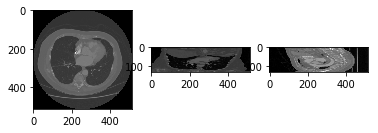

In [9]:
plt.subplot(1, 3, 1)
show_slice(im=sitk.GetArrayFromImage(LIDC0001), axis=0)
plt.subplot(1, 3, 2)
show_slice(im=sitk.GetArrayFromImage(LIDC0001), axis=1)
plt.subplot(1, 3, 3)
show_slice(im=sitk.GetArrayFromImage(LIDC0001), axis=2)